In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def eulers(dx_dt, y0, steps, h):
    t = np.arange(0, steps*h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t)-1):
        y[i + 1] = y[i] + h*dx_dt(y[i],t[i])
    return t, y
    
    


In [11]:
def heuns(dx_dt, y0, steps, h):
    t = np.arange(0, steps*h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t)-1):
        eulers = y[i] + h*dx_dt(y[i],t[i])
        y[i + 1] = y[i] + (h/2)*(dx_dt(y[i],t[i]) +  dx_dt(eulers, t[i + 1]))
    return t, y

In [12]:
def SIS_eulers(beta, h):
    gamma = 0.25
    N = 100
    I0 = 10 
    S0 = N - I0 
    num_steps = 50
    sus, inf = [], []
    S = S0; I = I0; 
    T = np.arange(1, num_steps/h);

    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    t, s = eulers(S_differential, S0, num_steps, h)
    t, i = eulers(I_differential, I0, num_steps, h)

    return s, i, t

In [13]:
def SIS_heuns(beta, h):
    gamma = 0.25
    N = 100
    I0 = 10 
    S0 = N - I0 
    num_steps = 50
    sus, inf = [], []
    S = S0; I = I0; 
    T = np.arange(1, num_steps/h);

    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    t, s = heuns(S_differential, S0, num_steps, h)
    t, i = heuns(I_differential, I0, num_steps, h)

    return s, i, t

In [14]:
def make_graphs(betas, step_sizes, SIS_function, title):
    plt.rcParams["figure.figsize"] = [18, 14]
    fig, axs = plt.subplots(len(betas), len(step_sizes))
    for i, b in enumerate(betas):
        for j, step in enumerate(step_sizes):
            susceptible, infected, t = SIS_function(b, step)
            axs[i, j].plot(t, susceptible, label="susceptible")
            axs[i, j].plot(t, infected, label="infected")
            axs[i, j].set_title("Beta = "+str(b) + ", step size = " + str(step))

            if i == 0 and j == 2:
                axs[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    fig.tight_layout()

    fig.text(0.5, 0.00025, 'Time', ha='center',fontsize=14)
    fig.text(0.00025, 0.5, 'Population', va='center', rotation='vertical',fontsize=14)
    plt.suptitle(title, fontsize=24 , y=1.02)
    plt.show()
    plt.savefig('huens')

<ipython-input-12-d595f7fc4eed>:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-12-d595f7fc4eed>:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-12-d595f7fc4eed>:12: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
<ipython-input-12-d595f7fc4eed>:12: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
<ipython-input-12-d595f7fc4eed>:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-12-d595f7fc4eed>:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-12-d595f7fc4eed>:12: RuntimeWarning:

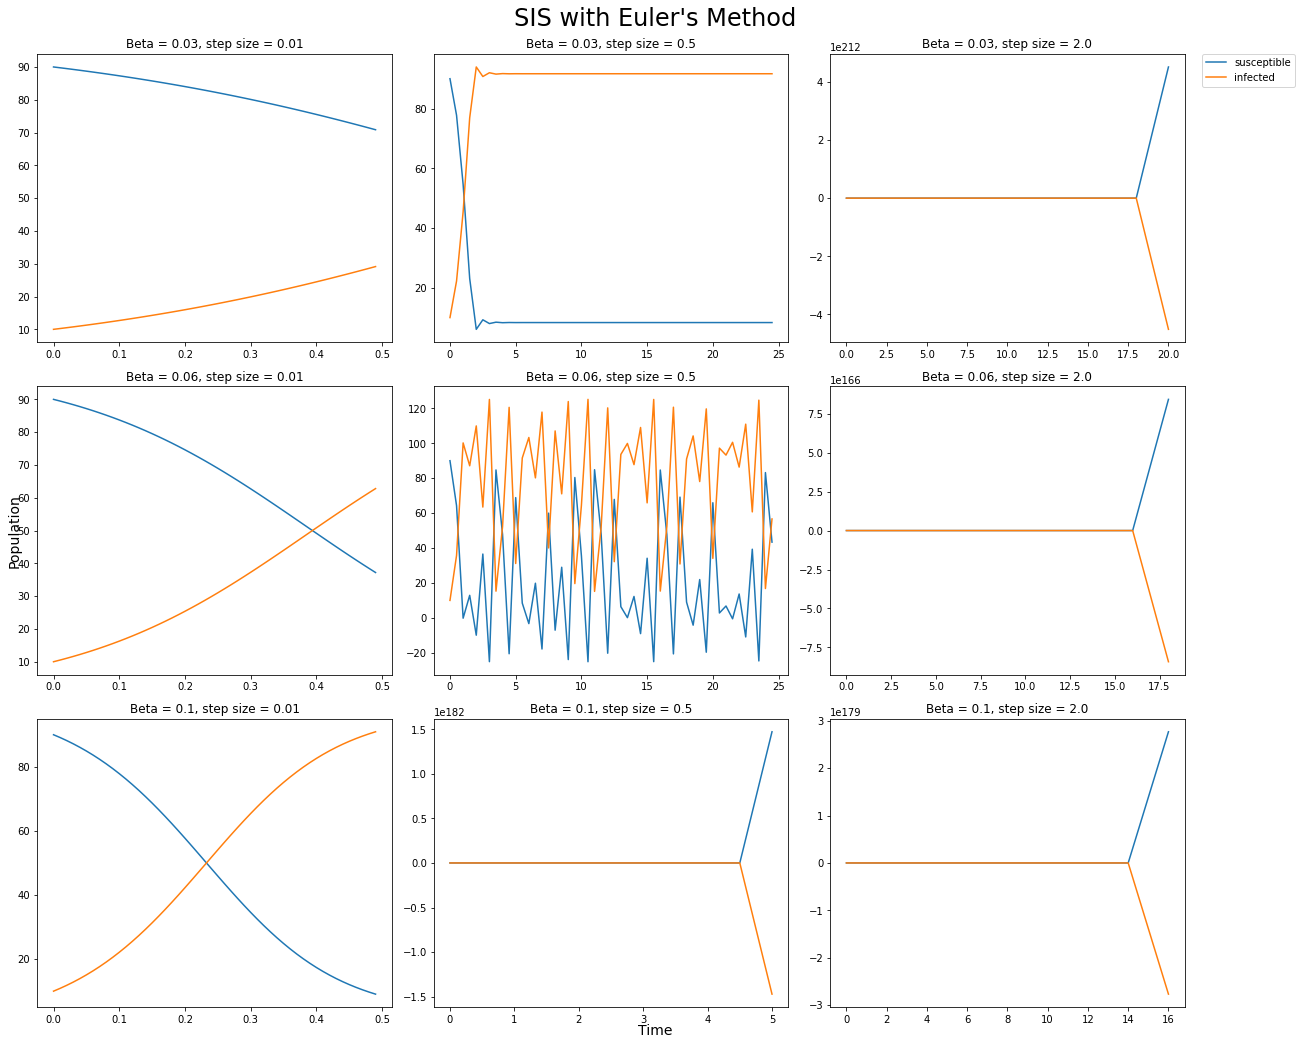

<Figure size 1296x1008 with 0 Axes>

In [15]:
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
make_graphs(betas, step_sizes, SIS_eulers, "SIS with Euler's Method")

<ipython-input-13-7dc48aa110fd>:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-13-7dc48aa110fd>:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-13-7dc48aa110fd>:12: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
<ipython-input-13-7dc48aa110fd>:12: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
<ipython-input-13-7dc48aa110fd>:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-13-7dc48aa110fd>:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
<ipython-input-13-7dc48aa110fd>:12: RuntimeWarning:

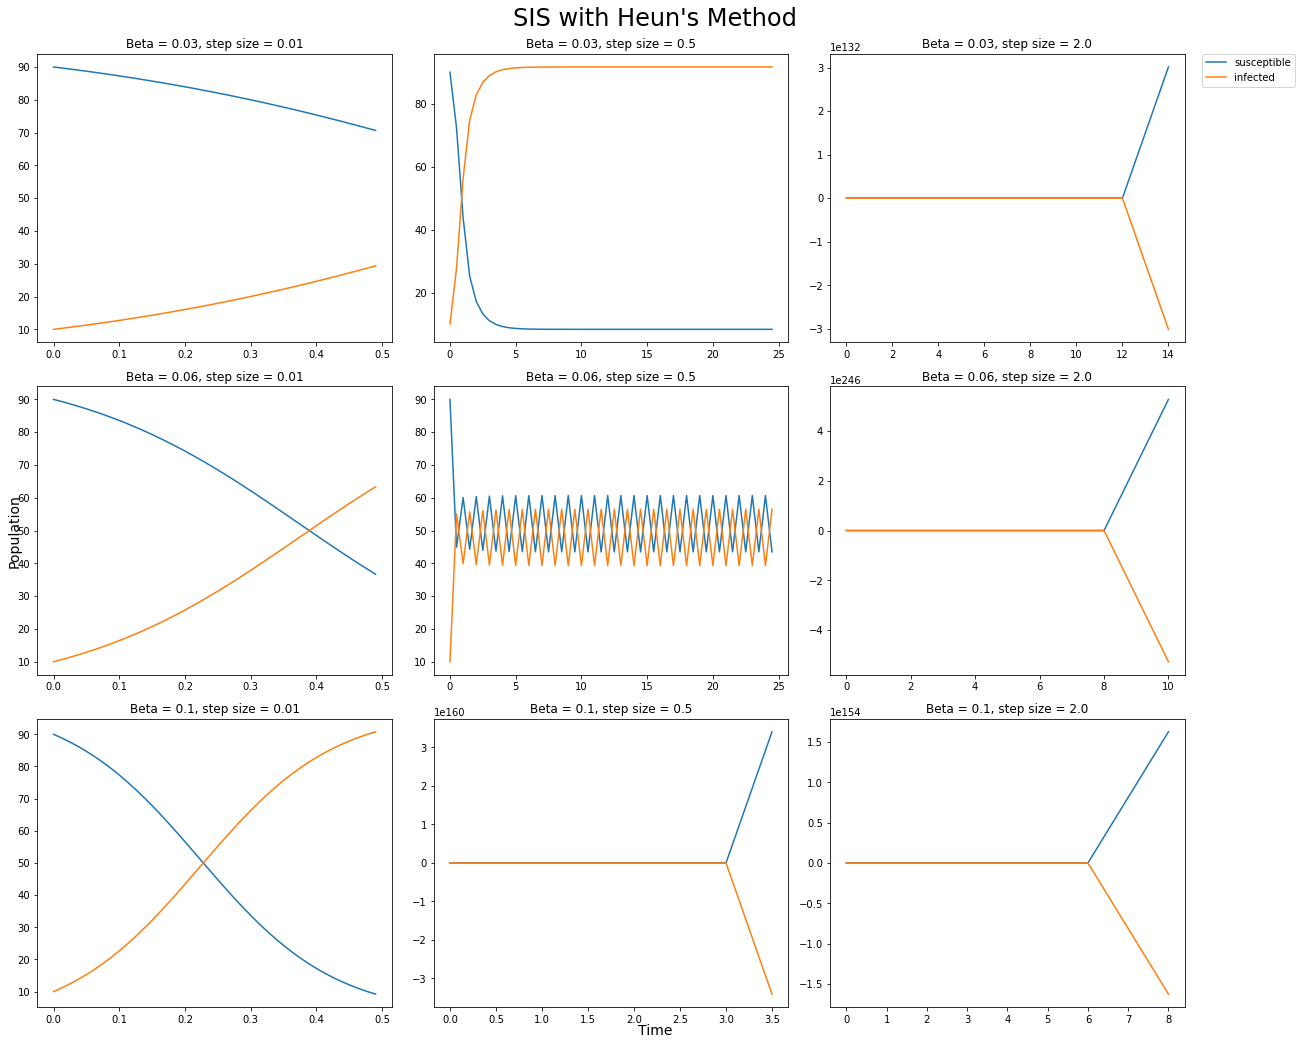

<Figure size 1296x1008 with 0 Axes>

In [16]:
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
make_graphs(betas, step_sizes, SIS_heuns, "SIS with Heun's Method")

Code for Question 7 - Modeling Vaccine Status

In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Scenario 1 - Beginning of vaccination release (messing with starting values for U,H,V and low beta and alpha values)
N=4000
beta = .4
alpha = .35
U0=3999
H0=1
V0=0


In [19]:
res = [] #list of results
U = U0; H = H0; V = V0 #set initial conditions
h =.0001; #timestep
T = np.arange(0, 10, h)
for t in T:
  delta_U = -U * beta*H #expected number of new infections
  U += delta_U*h #S(t+1)
  delta_V = alpha*H #expected number of new recoveries
  H+= (-delta_U - delta_V)*h #I(t+1)
  V+= delta_V*h #R(t+1)
  res.append((U,H,V))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
Ut,Ht,Vt = map(np.array, zip(*res))

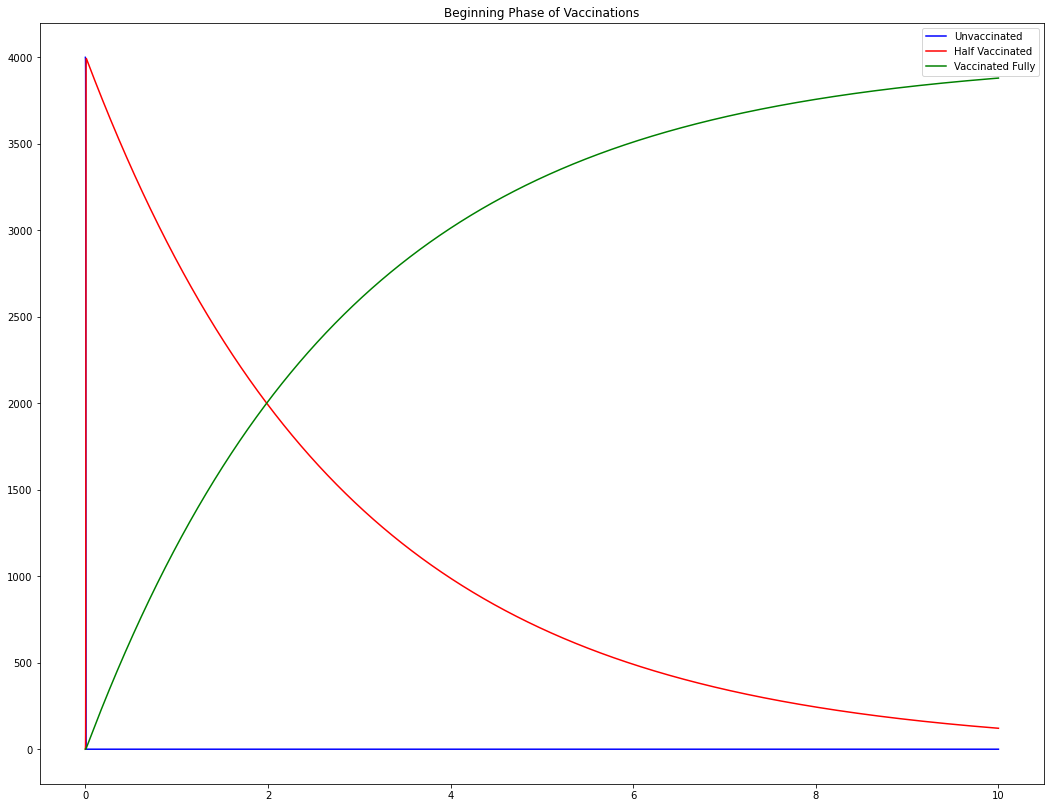

In [20]:
#plot results
fig,ax = plt.subplots()
ax.plot(T, Ut, 'b', label='Unvaccinated')
ax.plot(T,Ht, 'r', label='Half Vaccinated')
ax.plot(T,Vt, 'g', label='Vaccinated Fully')
ax.set_title('Beginning Phase of Vaccinations')
ax.legend();

In [21]:
# Scenario 2 - Middle of vaccination release, where more people are getting vaccinated  (messing with starting values for U,H,V and "medium" beta and alpha values)
N=4000
beta = .8
alpha = .7
U0=2000
H0=1000
V0=1000

In [22]:
res = [] #list of results
U = U0; H = H0; V = V0 #set initial conditions
h = .0001; #timestep
T = np.arange(0, 10, h)
for t in T:
  delta_U = -U * beta*H #expected number of new infections
  U += delta_U*h #S(t+1)
  delta_V = alpha*H #expected number of new recoveries
  H+= (-delta_U - delta_V)*h #I(t+1)
  V+= delta_V*h #R(t+1)
  res.append((U,H,V))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
Ut,Ht,Vt = map(np.array, zip(*res))

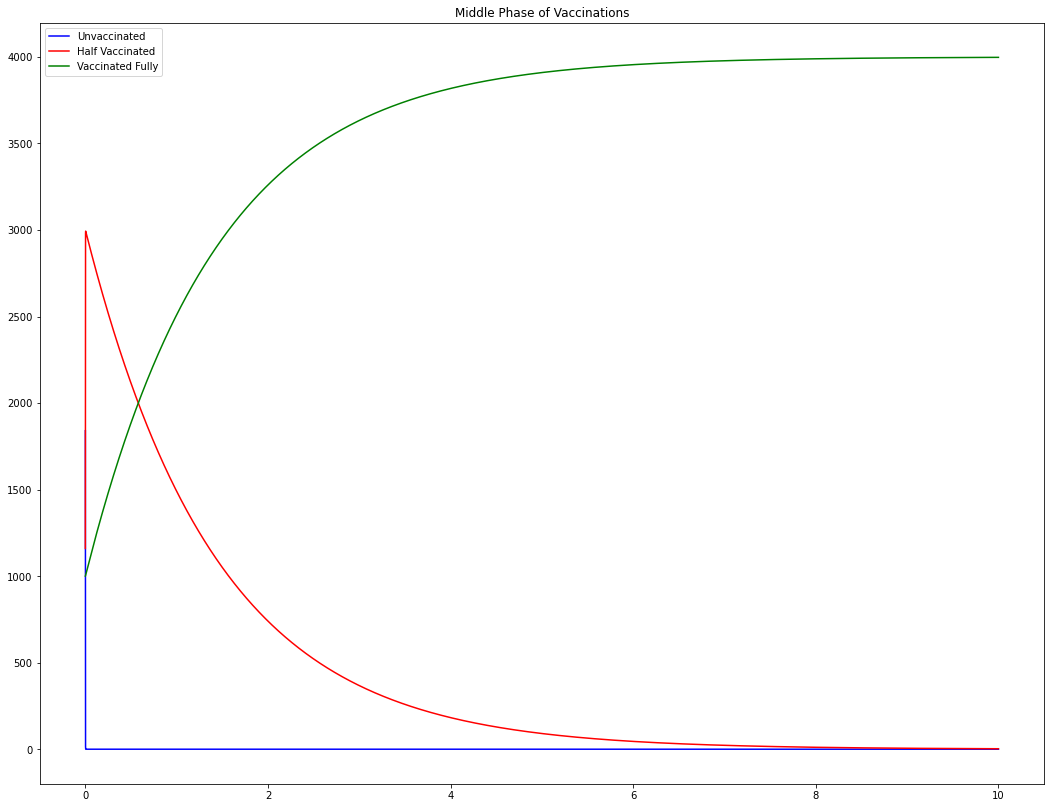

In [23]:
#plot results
fig,ax = plt.subplots()
ax.plot(T, Ut, 'b', label='Unvaccinated')
ax.plot(T,Ht, 'r', label='Half Vaccinated')
ax.plot(T,Vt, 'g', label='Vaccinated Fully')
ax.set_title('Middle Phase of Vaccinations')
ax.legend();

In [24]:
# Scenario 3 -End of vaccination release, where more people are getting vaccinated  (messing with starting values for U,H,V and "high" beta and alpha values)
N=4000
beta = .2
alpha = .1
U0=500
H0=500
V0=3000

In [25]:
res = [] #list of results
U = U0; H = H0; V = V0 #set initial conditions
h = .0001; #timestep
T = np.arange(0, 10, h)
for t in T:
  delta_U = -U * beta*H #expected number of new infections
  U += delta_U*h #S(t+1)
  delta_V = alpha*H #expected number of new recoveries
  H+= (-delta_U - delta_V)*h #I(t+1)
  V+= delta_V*h #R(t+1)
  res.append((U,H,V))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
Ut,Ht,Vt = map(np.array, zip(*res))

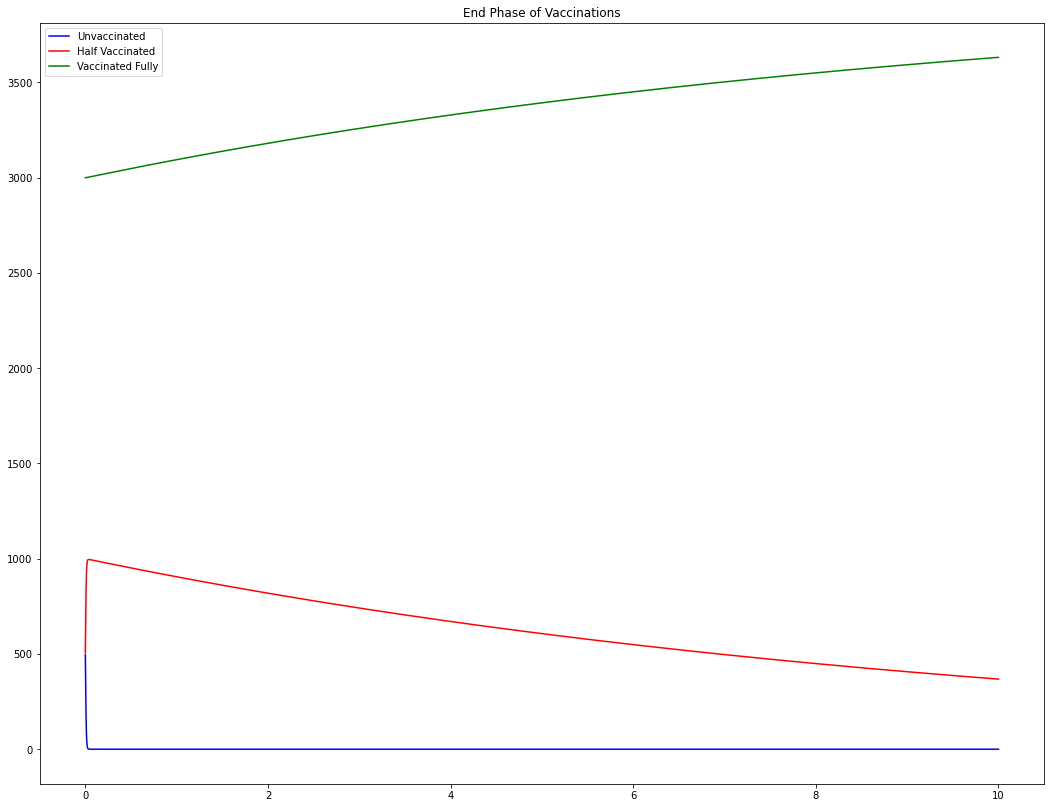

In [26]:
#plot results
fig,ax = plt.subplots()
ax.plot(T, Ut, 'b', label='Unvaccinated')
ax.plot(T,Ht, 'r', label='Half Vaccinated')
ax.plot(T,Vt, 'g', label='Vaccinated Fully')
ax.set_title('End Phase of Vaccinations')
ax.legend();